## nikolaの記事をjupyter labで書く ##

この記事はPython その2 Advent Calendarの22日目の記事です。
当日休日出勤になってしまっていたので遅刻してしまいました。すいません。

nikolaはipynbファイルでブログが書けるstatic site generatorの一種です。
nikoflaについては過去に記事を書いていますのでご覧ください。
https://www.hiromasa.info/categories/nikola/

### jupyter labの実行環境 ###

ここではjupyter公式の[scipy-notebook](https://hub.docker.com/r/jupyter/scipy-notebook)のdockerイメージを立ち上げてjupyter labを動かしています。ゆくゆくはこれにnikolaのブログ構築環境を追加したイメージを作成したいと思っています。
実行する場合は下記のような感じでブログ本体のあるディレクトリを`/mnt/blog`にマッピングしてローカルホストに対してポート8888でアクセスします。

```sh
docker run -ti -v /path/to/blog:/mnt/blog -p 8888:8888 jupyter/scipy-notebook /bin/bash
```

### jupyter labでのMetadataの設定 ###

Nikolaでは[この記事](https://www.hiromasa.info/posts/3/)に書いたように.ipynbファイルを公開する場合はblog用のメタデータを.ipynbファイルに付与する必要があります。
Metadataの設定はhttps://github.com/jupyterlab/jupyterlab/issues/1308
のissueで議論され、https://github.com/jupyterlab/jupyterlab/pull/5968 のプルリクエストで追加するためのUIが4月ごろに追加されています。

メタデータを付与するためには、一番左側のアイコンの並んでいるカラムからスパナアイコンを選択肢、Advanced Toolsの中のNotebook Metadataを編集すれば良いです。この記事では下記の様な感じにしています。

```json
    "nikola": {
        "tags": "python,docker,nikola,jupyterlab",
        "title": "nikolaの記事をjupyter labで書く",
        "date": "2019-12-22 23:00:00 UTC+09:00",
        "type": "text",
        "slug": "16",
        "category": "",
        "link": "",
        "description": ""
    }
```

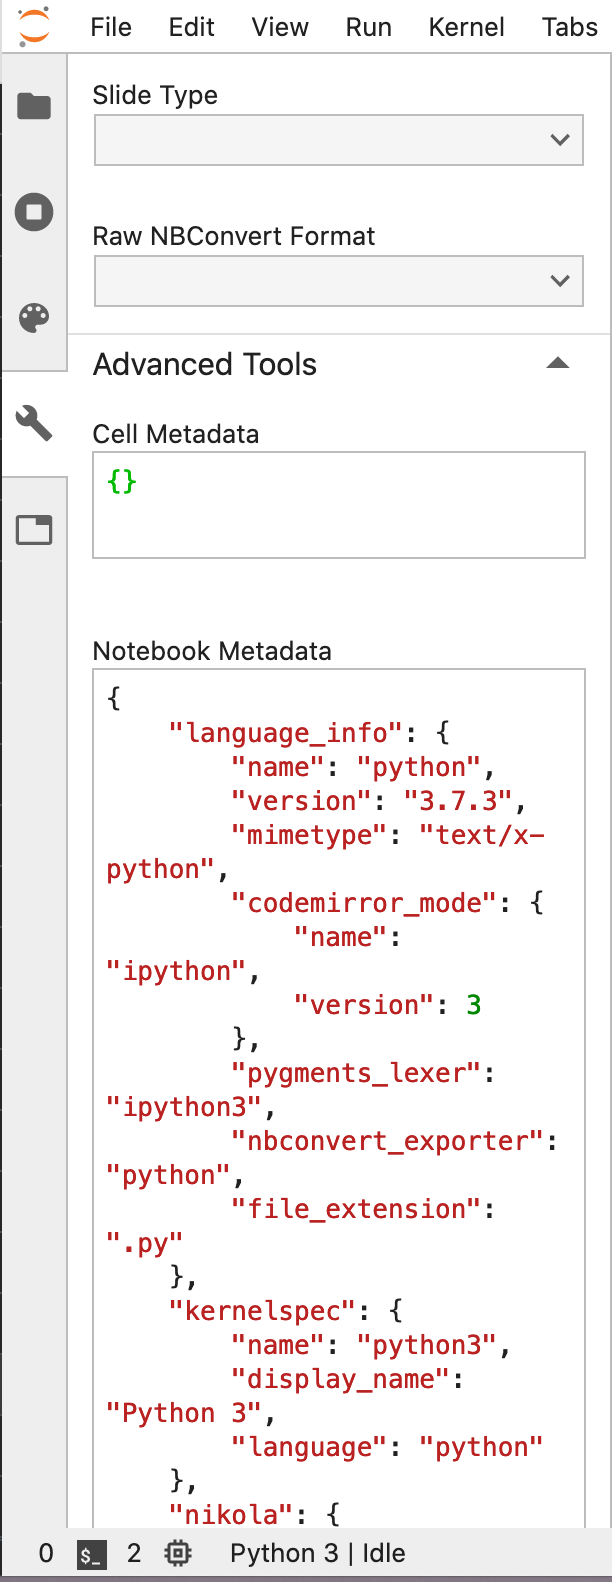

### 画像のDrag & Dropおよびペースト

この[プルリクエスト](https://github.com/jupyterlab/jupyterlab/pull/5913)によれば、

* ファイルブラウザからセルへのドラッグアンドドロップによるファイルの保存
* セルへの画像のペースト
* セルのソースをattachmentを加えるように変更する
* セルのattatchmentがセルの出力のどこからも参照されていない場合にはattachmentを削除する

が既に実現されているようです。
上記には記述がありませんが、そもそも(finderなどから)ファイルブラウザへのドラッグアンドドロップによる保存は可能ですので、そこから更にセルにドラッグアンドドロップすることも可能ですし、osxなら`shift+ctrl+command+4`で範囲選択した内容を`command+v`で挿入できるので便利です。挿入した画像はbase64エンコードされてipynbに埋め込まれます。注意が必要なのは各セルに対してattachmentを複数埋め込むと後から貼り付けたもので上書きされてしまう点です。各セルに`command+v`で貼る画像は今の所一つにとどめておいた方が無難なようです。

### extensionの導入 ###

`shift+command+c`でコマンドパレットを表示し、`Enable Extension Manager`を選択・実行してEnableにすると左側のアイコンが並んでいるカラムにextention managerが表示されます。これによりjupyter lab上からextensionがインストールできるようになります。コマンドライン上で`jupyter labextension install`を実行するのと同等の操作が実行できるのだと思います。ここでは試しに`toc`と打ってみて目次を表示するextensionである`@jupyterlab/toc`をインストールしてみます。


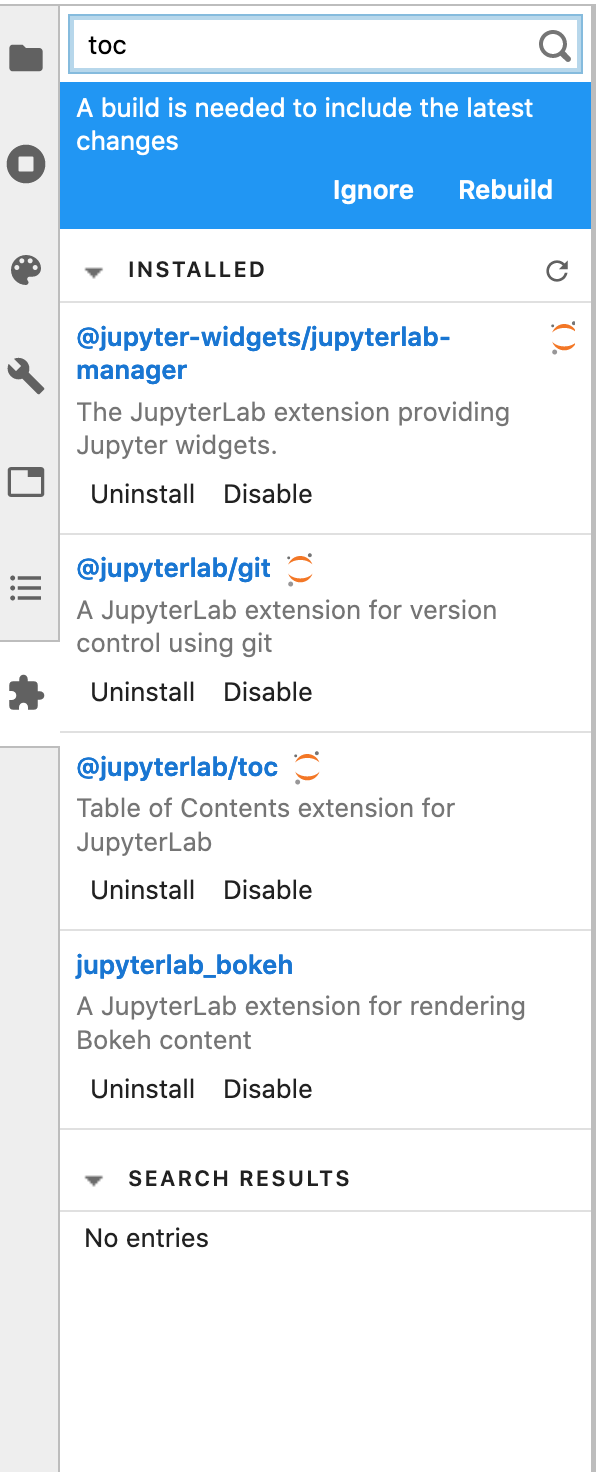

インストールを実行したあとにブラウザのタブをリロードすると、ビルドするかを尋ねられるのでビルドを実行後、ビルドが完了するとreloadを求められました。reload後、左側のアイコンのカラムにTOCのアイコンが出現していました。

更にgitのextensionである`@jupyter/git`をインストールしてみます。
インストールを実行すると、下記のようにこのextensionを使用する前に対応したserver extensionである`jupyter-git`をインストールしておく必要があると言われます。
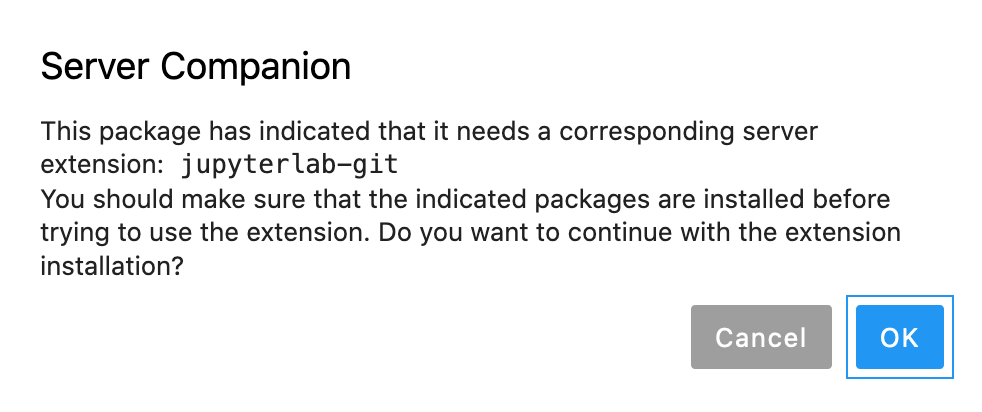

自分はserver extensionを入れる前にOKを押してしまいましたが、先程と同じようにブラウザのタブをリロードするとextensionのビルドが求められました。しばらくするとBuildが完了した旨が表示されます。

server extensionを入れるにはpipで`jupyterlab_git`を入れた後に`jupyter serverextension enable --py jupyterlab_git`を実行すれば良いようです。

In [13]:
! pip install jupyterlab_git

     |████████████████████████████████| 153kB 641kB/s eta 0:00:01
     |████████████████████████████████| 4.3MB 294kB/s eta 0:00:01
     |████████████████████████████████| 460kB 801kB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.7MB/s eta 0:00:01


In [14]:
! jupyter serverextension enable --py jupyterlab_git

Enabling: jupyterlab_git
- Writing config: /home/jovyan/.jupyter
    - Validating...
      jupyterlab_git  OK


上記を実行した後にブラウザのタブを再実行したところ`nbdime-jupyterlab`のビルドがダイアログが表示され要求されたため実行しました。
しかしここまでを実行したところ、左側のアイコンが並んでいるカラムにgitのアイコンが表示されるようにはなりましたが、ローカルのリポジトリを読み込んでくれる気配がありませんのでこのあたりについては要調査の上で追記したいと思います。

*2020/1/13追記*

* 後日確認したところjupyter lab上でgitのextensionをインストールする前に`jupyter serverextension enable --py jupyterlab_git`を実行しておくと、自動的にjupyter labのextensionもインストールされていました
* 事前にコマンドラインからビルドを実行しておく場合は`jupyter lab build`で行けるようです
* ローカルのリポジトリを読み込まない問題は[リポジトリのページ](https://github.com/jupyterlab/jupyterlab-git)を確認したところTroubleShootingの欄の`Issue: the Git panel does not recognize that you are in a Git repository.`として記載がありましたが原因は`jupyter serverextension enable --py jupyterlab_git`を実行し更にコマンドラインまたはjupyter lab上の表示からビルドを行った後にjupyter labを立ち上げていないことでした。つまり稼働中にserverextensionをenableにするのではなく、稼働前にしておく必要がありました。jupyter labを再起動したら下記のような感じのインタフェースが使えるようになりました。

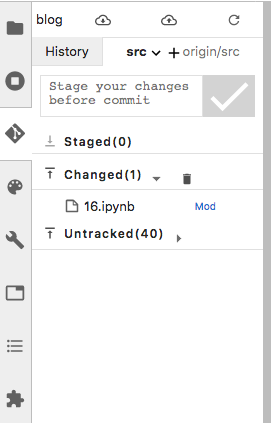

### ブログのビルド

ここではブログのビルド自体はローカル環境(docker上ではない)で実行しています。

```sh
$ nikola build
$ nikola serve -b
```

上記を実行するとビルドを実行した上でローカルサーバを立ち上げてくれ、`-b`オプションによって自動的にブラウザのタブが開きます。内容に問題ないことを確認したら、あとはサーバーにプッシュしておしまいです。

### まとめ

jupyter lab上でブログを執筆する環境構築について記しました。